In [1]:
import plotly.graph_objects as go
import networkx as nx

test_name = "vist"

stat_path=f"example_stat/{test_name}"
iamge_path=f"{stat_path}/images"




In [2]:
# My util libs
import utils.stat_loader as sload
import utils.stat_print as sp
import utils.vol_stat2graph as vol2g
import utils.vol_graph2sankey as vol2sk

# Improve Functions
## TODO
- (Maybe) Add adjustment of label to full label, file-task label, and no lables
- add VFD stats for file node
- Maps dataset y-axis with blob number as the position, x-axis with first access time

## Maybe
- add option to filter dataset nodes networkx graph (to reduce graph size)

## DONE
- DONE:Add task cutoff option for graphs
- Add task start option for graphs
    - Be careful about adding the required files??!!
- some read_only edges seems wrong direction (maybe `set_task_file_dset_pos`)

In [4]:
STAGE_START = 0
STAGE_END = 6


TASK_ORDER_LIST = sload.load_task_order_list(stat_path)
STAGE_END = sload.correct_end_stage(TASK_ORDER_LIST, STAGE_END)

TASK_ORDER_LIST = sload.current_task_order_list(TASK_ORDER_LIST, STAGE_START, STAGE_END)

TASK_LISTS = list(TASK_ORDER_LIST.keys())

print(f"TASK_ORDER_LIST = {TASK_ORDER_LIST}")
TASK_LISTS

STAGE_END is not in TASK_ORDER_LIST, set to max order: 1
TASK_ORDER_LIST = {'arldm_saveh5': 0, 'arldm_train': 1}


['arldm_saveh5', 'arldm_train']

In [9]:
task_file_map = sload.load_task_file_map(stat_path, test_name, TASK_LISTS)


for task, stat in task_file_map.items():
    print(f"{task} : {stat}")


vol_files = sload.find_files_with_pattern(stat_path, "vol")
# vol_files = vol_files[0:1]
print(f"vol_files: {vol_files}")


vol_dict = sload.load_stat_json(vol_files)
# sp.print_file_stat(vol_dict)
print("loading json done")




task_file_map = {'arldm_saveh5-271485': {'order': 0, 'io_cnt': 118, 'input': [], 'output': ['/home/mtang11/experiments/ARLDM/output_data/vistsis_out.h5']}, 'arldm_train-271491': {'order': 1, 'io_cnt': 17, 'input': ['/mnt/common/mtang11/experiments/ARLDM/output_data/vistsis_out.h5'], 'output': []}, 'arldm_train-271566': {'order': 1, 'io_cnt': 11, 'input': ['/mnt/common/mtang11/experiments/ARLDM/output_data/vistsis_out.h5'], 'output': []}}
arldm_saveh5-271485 : {'order': 0, 'io_cnt': 118, 'input': [], 'output': ['/home/mtang11/experiments/ARLDM/output_data/vistsis_out.h5']}
arldm_train-271491 : {'order': 1, 'io_cnt': 17, 'input': ['/mnt/common/mtang11/experiments/ARLDM/output_data/vistsis_out.h5'], 'output': []}
arldm_train-271566 : {'order': 1, 'io_cnt': 11, 'input': ['/mnt/common/mtang11/experiments/ARLDM/output_data/vistsis_out.h5'], 'output': []}
vol_files: ['example_stat/vist/271485-vol_data_stat.json', 'example_stat/vist/271491-vol_data_stat.json']
loading example_stat/vist/271485-

In [15]:
# Show All VOL Tracker overhead
sp.show_all_overhead("VOL",vol_dict)

for file in vol_dict:
    print(f"file: {file} -> {vol_dict[file]}")

Total VOL overhead: 37.0 ms
file: example_stat/vist/271485-vol_data_stat.json -> [{'file-0': {'file_name': '/home/mtang11/experiments/ARLDM/output_data/vistsis_out.h5', 'task_name': 'arldm_saveh5-271485', 'datasets': [{'dset_name': 'image4', 'start_time': 1707802761004197, 'end_time': 1707802769395033, 'dt_class': 'H5T_VLEN', 'ds_class': 'H5S_SCALAR', 'layout': 'H5D_CONTIGUOUS', 'storage_size': 0, 'dset_n_elements': 43, 'dimension_cnt': 1, 'dimensions': [43], 'dset_type_size': 16, 'dataset_read_cnt': 0, 'dataset_write_cnt': 51, 'access_type': 'write_only', 'dset_offset': -1, 'dset_select_type': 'H5S_SEL_ALL', 'dset_select_npoints': 43, 'access_orders': [5]}]}}, {'file-0': {'file_name': '/home/mtang11/experiments/ARLDM/output_data/vistsis_out.h5', 'task_name': 'arldm_saveh5-271485', 'datasets': [{'dset_name': 'image3', 'start_time': 1707802761003955, 'end_time': 1707802769395008, 'dt_class': 'H5T_VLEN', 'ds_class': 'H5S_SCALAR', 'layout': 'H5D_CONTIGUOUS', 'storage_size': 0, 'dset_n_ele

In [19]:
G_VOL = nx.DiGraph()
G_VOL = vol2g.add_task_dset_file_edges(G_VOL, vol_dict,TASK_LISTS)

# sp.display_all_nodes_attr(G_VOL)
# sp.print_edges(G_VOL)
# sp.draw_graph(G_VOL, test_name, graph_type="vol", prefix=f'{(STAGE_END+1)}s', save=True)

example_stat/seq9f9s/231950-vol_data_stat.json


task_name: run_matchpf-231950, task_order: 5
node run_matchpf-231950 : {'pos': (2, 202), 'rpos': 0, 'order': 202, 'type': 'task'}, pos: (2, 202)
node : run_matchpf-231950, pos: (15, 0)
task_name: run_robustmcs-231950, task_order: 6
node run_robustmcs-231950 : {'pos': (2, 242), 'rpos': 0, 'order': 242, 'type': 'task'}, pos: (2, 242)
node : run_robustmcs-231950, pos: (18, 0)


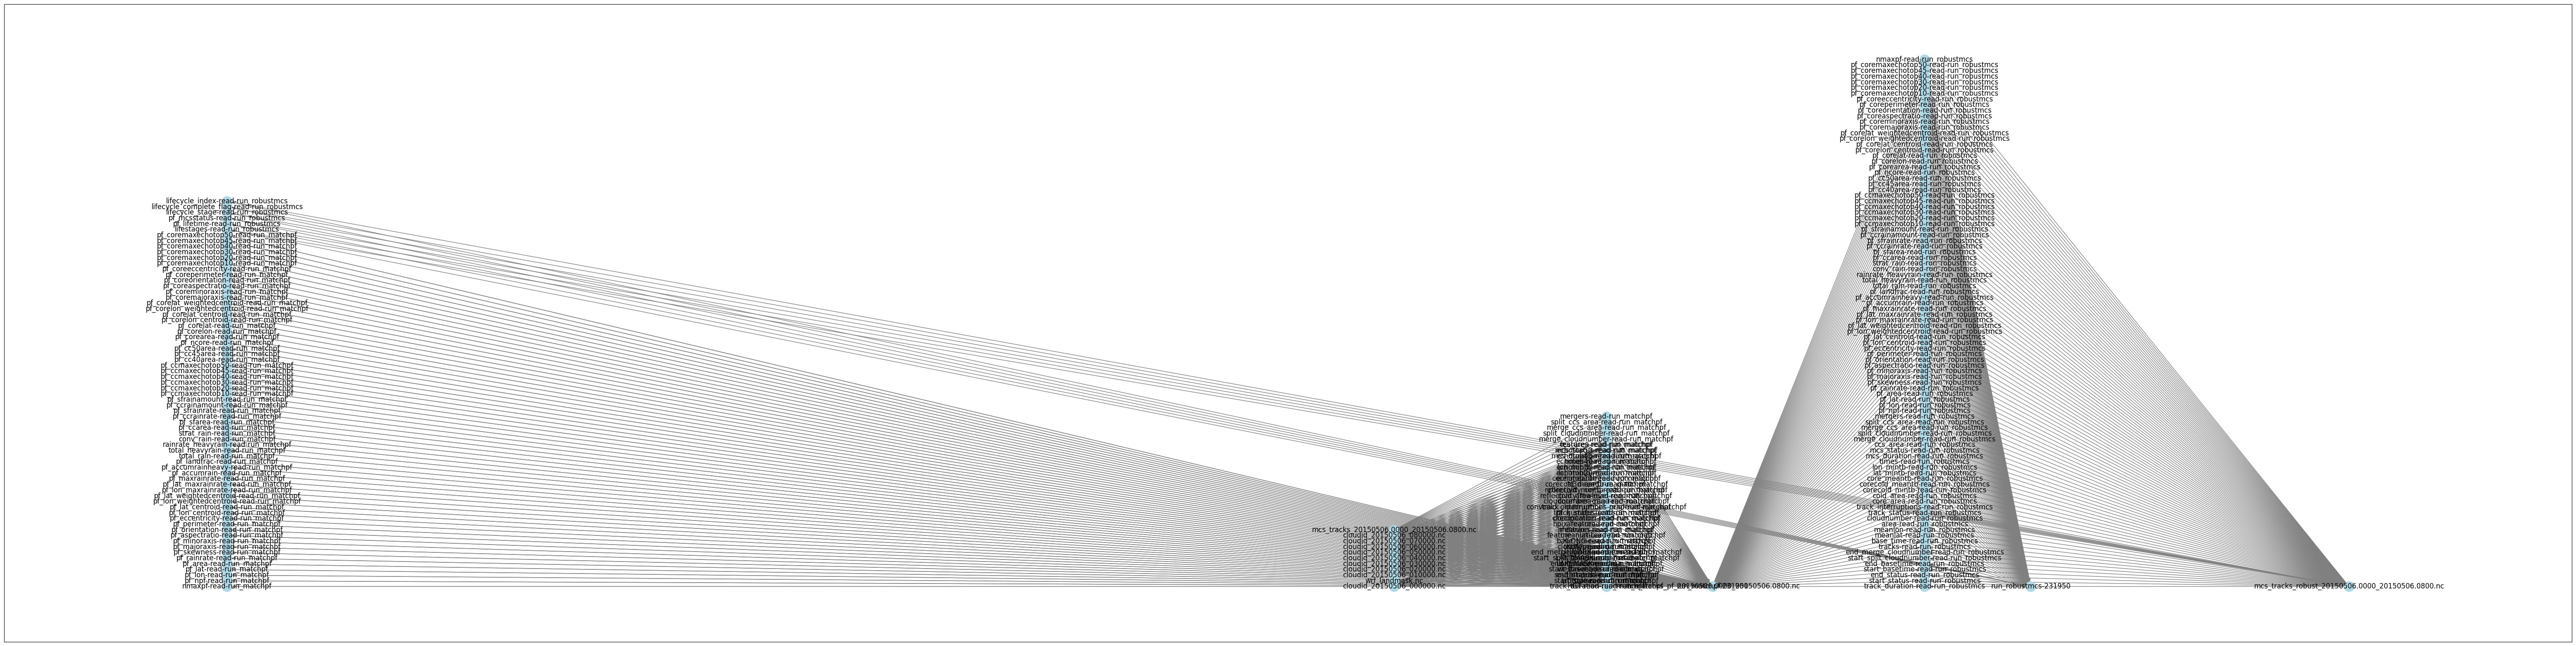

In [20]:
G_VOL = vol2g.set_task_position(G_VOL, task_file_map, STAGE_START)
# print(task_file_map)
G_VOL = vol2g.set_task_file_dset_pos(G_VOL, task_file_map)
sp.draw_graph(G_VOL, test_name, stat_path, graph_type="vol", prefix=f'{(STAGE_END+1)}s', save=True)

# Add networkx to Sankey diagram

## Statistics for Sankey
Below are needed edge attributes before generating the sankey diagram:
- access_cnt : The total file/dataset access count 
- access_size : The total read and write access size
- operation : The operation type : read, write, read_write
- bandwidth : Get the per access size and time, then calculate the bandwidth. Average the bandwidth if multiple accesses. (TODO: currently only recording one access size and time)


In [21]:
vol2sk.prepare_sankey_stat(G_VOL)


In [22]:
vol2sk.time_to_file_x_pos(G_VOL)

wrf_landmask.nc New pos:  (12.0, 1)
cloudid_20150506_000000.nc New pos:  (12.0, 0)
cloudid_20150506_010000.nc New pos:  (12.0375, 2)
cloudid_20150506_020000.nc New pos:  (12.075, 3)
cloudid_20150506_030000.nc New pos:  (12.1125, 4)
cloudid_20150506_040000.nc New pos:  (12.15, 5)
cloudid_20150506_050000.nc New pos:  (12.1875, 6)
cloudid_20150506_060000.nc New pos:  (12.225, 7)
cloudid_20150506_070000.nc New pos:  (12.2625, 8)
cloudid_20150506_080000.nc New pos:  (12.3, 9)
mcs_tracks_robust_20150506.0000_20150506.0800.nc New pos:  (21.0, 0)


In [23]:
vol_nodes, vol_nodes_dict = vol2sk.get_nodes_for_sankey(G_VOL, label_on=True)

# print(vol_nodes)

vol_links = vol2sk.get_links_for_sankey(G_VOL, vol_nodes_dict)
fig = go.Figure(go.Sankey(
            node = vol_nodes,
            link = vol_links, orientation='h'))



bandwidth range: 0.17 B/s ~ 2.47 GB/s


In [24]:
width = 3200
height = 1200

fig.update_layout(
    autosize=False,
    width=width,
    height=height,
    margin=dict(
        l=width/100,
        r=width/100,
        b=height/20,
        t=height/5,
        # pad=2
    ),
    font=dict(size=18),
)
fig.show()

saved_image_path = f"{stat_path}/vol-{(STAGE_END+1)}s-{test_name}-sankey.html"

fig.write_html(saved_image_path)
print(f"saved to : {saved_image_path}")

saved to : example_stat/seq9f9s/vol-7s-seq9f9s-sankey.html


In [25]:
DATASET_LIMIT = 10

for node, node_attr in vol_nodes.items():
    print(f"{node} : {node_attr}")

print()

vol_nodes_new_dict = {}
dset_count = 0

for node, attr in vol_nodes_dict.items():    
    vol_nodes_new_dict[node] = attr
    # print(f"{node} : {attr}")
    if attr['type'] == 'dataset':
        dset_count+=1
    if dset_count >= DATASET_LIMIT:
        break

print()
        
for node, attr in vol_nodes_new_dict.items():
    print(f"{node} : {attr}")

# get index of selected nodes
wanted_nodes_index = []
for idx, node in enumerate(vol_nodes['label']):
    if node in vol_nodes_new_dict.keys():
        wanted_nodes_index.append(idx)

print(f"wanted_nodes_index: {wanted_nodes_index}")

# select wanted nodes with attributes
vol_new_nodes = {}
for key, val in vol_nodes.items():
    vol_new_nodes[key] = [val[i] for i in wanted_nodes_index]

print(f"New nodes: ")
for node, node_attr in vol_new_nodes.items():
    print(f"{node} : {node_attr}")

# # select wanted links with attributes
# vol_new_links = {}
# for key, val in vol_links.items():
#     vol_new_links[key] = [val[i] for i in wanted_nodes_index]

# print(f"New links: ")
# for link, attr in vol_new_links.items():
#     print(f"{link} : {attr}")



label : ['mcs_tracks_20150506.0000_20150506.0800.nc', 'track_duration-read-run_matchpf', 'run_matchpf-231950', 'start_status-read-run_matchpf', 'end_status-read-run_matchpf', 'start_basetime-read-run_matchpf', 'end_basetime-read-run_matchpf', 'start_split_cloudnumber-read-run_matchpf', 'end_merge_cloudnumber-read-run_matchpf', 'tracks-read-run_matchpf', 'base_time-read-run_matchpf', 'meanlat-read-run_matchpf', 'meanlon-read-run_matchpf', 'area-read-run_matchpf', 'cloudnumber-read-run_matchpf', 'track_status-read-run_matchpf', 'track_interruptions-read-run_matchpf', 'core_area-read-run_matchpf', 'cold_area-read-run_matchpf', 'corecold_mintb-read-run_matchpf', 'corecold_meantb-read-run_matchpf', 'core_meantb-read-run_matchpf', 'lat_mintb-read-run_matchpf', 'lon_mintb-read-run_matchpf', 'times-read-run_matchpf', 'mcs_duration-read-run_matchpf', 'mcs_status-read-run_matchpf', 'ccs_area-read-run_matchpf', 'merge_cloudnumber-read-run_matchpf', 'split_cloudnumber-read-run_matchpf', 'merge_ccs

In [26]:
vol_new_links = vol2sk.get_links_for_sankey(G_VOL, vol_nodes_new_dict, val_sqrt=False)

fig = go.Figure(go.Sankey(
            node = vol_new_nodes,
            link = vol_new_links, orientation='h'))

width = 1000
height = 400

fig.update_layout(
    autosize=False,
    width=1000,
    height=400,
    margin=dict(
        l=width/100,
        r=width/100,
        b=0,
        t=height/5,
    ),
    font=dict(size=18),
)
fig.show()

saved_image_path = f"{stat_path}/vol-{(STAGE_END+1)}s-{test_name}-sankey-{DATASET_LIMIT}dset.html"

fig.write_html(saved_image_path)
print(f"saved to : {saved_image_path}")

bandwidth range: 0.17 B/s ~ 2.47 GB/s


saved to : example_stat/seq9f9s/vol-7s-seq9f9s-sankey-10dset.html
